# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2021 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani

## Lab 2 - Classification
### @author: Amin Kabir - kabir@sfu.ca


In [80]:
# Load General Libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [81]:
# Importing the dataset
df0 = pd.read_csv("EMG\EMG_0.csv", header=None)
df1 = pd.read_csv("EMG\EMG_1.csv", header=None)
df2 = pd.read_csv("EMG\EMG_2.csv", header=None)
df3 = pd.read_csv("EMG\EMG_3.csv", header=None)
dataset = pd.concat([df0,df1,df2,df3], axis = 0)

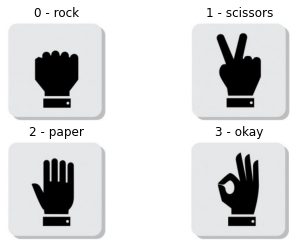

In [82]:
# Display What Each Label Refers To
import matplotlib.image as mpimg

img0 = mpimg.imread('EMG/0.jpg')
img1 = mpimg.imread('EMG/1.jpg')
img2 = mpimg.imread('EMG/2.jpg')
img3 = mpimg.imread('EMG/3.jpg')

fig = plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img0)
plt.axis('off')
plt.title('0 - rock')
plt.subplot(2, 2, 2)
plt.imshow(img1)
plt.axis('off')
plt.title('1 - scissors')
plt.subplot(2, 2, 3)
plt.imshow(img2)
plt.axis('off')
plt.title('2 - paper')
plt.subplot(2, 2, 4)
plt.imshow(img3)
plt.axis('off')
plt.title('3 - okay')

plt.show()

In [83]:
# Split features and targets - X: Features, y: Targets
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

In [84]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Save Test Set
np.savetxt("features_emg_test.csv", X_test, delimiter=",")
np.savetxt("targets_emg_test.csv", y_test, delimiter=",")

In [85]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test))

# Classification Models

In [86]:
# Some Functions for Showing the Classifier Performance
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

def classifier_performance(model,y_pred):
    print('Classification Report: \n', classification_report(y_test,y_pred))
    # Plot normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=['rock','scissors','paper','ok'],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    plt.show()
    return

### Decision Trees Classification

In [87]:
from sklearn.tree import DecisionTreeClassifier
MODEL_DT = DecisionTreeClassifier()

# Train the Model
MODEL_DT.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_DT, open('MODEL_CLASSIFICATION_DT.pkl', 'wb'))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       563
           1       0.80      0.74      0.77       601
           2       0.77      0.77      0.77       589
           3       0.69      0.72      0.71       583

    accuracy                           0.78      2336
   macro avg       0.78      0.78      0.78      2336
weighted avg       0.78      0.78      0.78      2336

Confusion matrix, without normalization
[[496   6  21  40]
 [  5 446  61  89]
 [ 31  48 453  57]
 [ 55  59  50 419]]
Normalized confusion matrix
[[0.88099467 0.01065719 0.03730018 0.07104796]
 [0.00831947 0.74209651 0.1014975  0.14808652]
 [0.05263158 0.08149406 0.76910017 0.09677419]
 [0.09433962 0.10120069 0.08576329 0.7186964 ]]


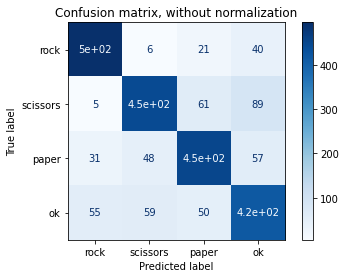

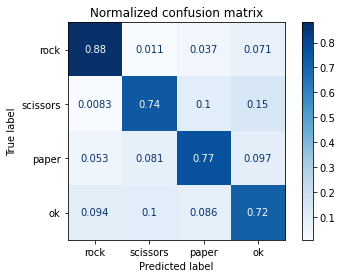

In [88]:
# Evaluate the Trained Model

# Predict the Trained Model on our Test data
y_pred_DT = MODEL_DT.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_DT,y_pred_DT)

### K Nearest Neighbors Classification

In [89]:
from sklearn.neighbors import KNeighborsClassifier
MODEL_KNN = KNeighborsClassifier(n_neighbors=5)

# Train the Model
MODEL_KNN.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_KNN, open('MODEL_CLASSIFICATION_KNN.pkl', 'wb'))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.66      0.77       563
           1       0.58      0.93      0.71       601
           2       0.84      0.34      0.49       589
           3       0.62      0.78      0.69       583

    accuracy                           0.68      2336
   macro avg       0.74      0.68      0.67      2336
weighted avg       0.74      0.68      0.67      2336

Confusion matrix, without normalization
[[372 106  36  49]
 [  0 561   1  39]
 [  5 196 202 186]
 [ 21 108   1 453]]
Normalized confusion matrix
[[0.660746   0.18827709 0.06394316 0.08703375]
 [0.         0.93344426 0.00166389 0.06489185]
 [0.00848896 0.3327674  0.34295416 0.31578947]
 [0.03602058 0.18524871 0.00171527 0.77701544]]


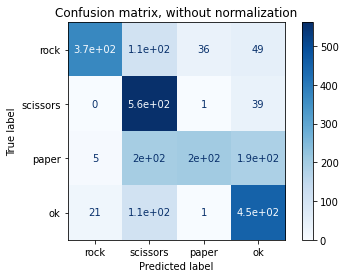

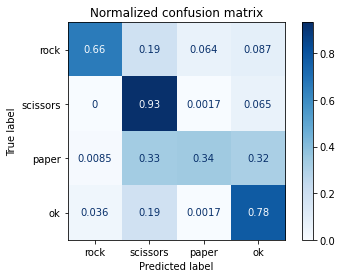

In [90]:
# Evaluate the Trained Model

# Predict the Trained Model on our Test data
y_pred_KNN = MODEL_KNN.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_KNN,y_pred_KNN)

### Gaussian Naive Bayes Classification

In [91]:
from sklearn.naive_bayes import GaussianNB
MODEL_GNB = GaussianNB()

# Train the Model
MODEL_GNB.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_GNB, open('MODEL_CLASSIFICATION_GNB.pkl', 'wb'))

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       563
           1       0.86      0.95      0.90       601
           2       0.95      0.92      0.93       589
           3       0.84      0.76      0.80       583

    accuracy                           0.89      2336
   macro avg       0.89      0.89      0.88      2336
weighted avg       0.89      0.89      0.89      2336

Confusion matrix, without normalization
[[514   0   5  44]
 [  0 572  13  16]
 [  9  16 539  25]
 [ 49  77  12 445]]
Normalized confusion matrix
[[0.91296625 0.         0.00888099 0.07815275]
 [0.         0.95174709 0.02163062 0.0266223 ]
 [0.01528014 0.02716469 0.91511036 0.04244482]
 [0.08404803 0.13207547 0.02058319 0.76329331]]


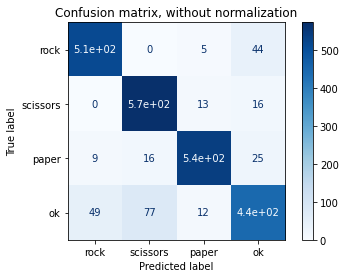

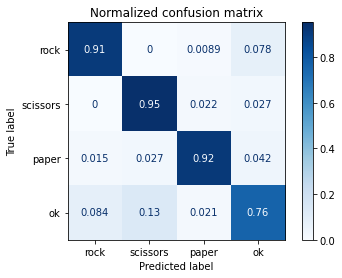

In [92]:
# Evaluate the Trained Model

# Predict the Trained Model on our Test data
y_pred_GNB = MODEL_GNB.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_GNB,y_pred_GNB)

### Support Vector Machines

In [93]:
from sklearn import svm
MODEL_SVM = svm.SVC()

# Train the Model
MODEL_SVM.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_SVM, open('MODEL_CLASSIFICATION_SVM.pkl', 'wb'))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       563
           1       0.89      0.98      0.93       601
           2       0.93      0.88      0.90       589
           3       0.86      0.85      0.86       583

    accuracy                           0.90      2336
   macro avg       0.90      0.90      0.90      2336
weighted avg       0.90      0.90      0.90      2336

Confusion matrix, without normalization
[[514   9  27  13]
 [  1 586   4  10]
 [  3  13 518  55]
 [ 33  47   9 494]]
Normalized confusion matrix
[[0.91296625 0.01598579 0.04795737 0.02309059]
 [0.00166389 0.9750416  0.00665557 0.01663894]
 [0.00509338 0.02207131 0.87945671 0.09337861]
 [0.05660377 0.0806175  0.01543739 0.84734134]]


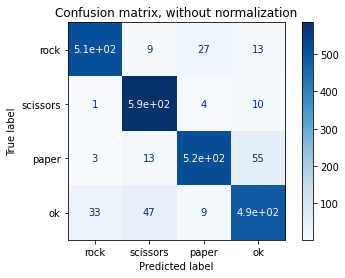

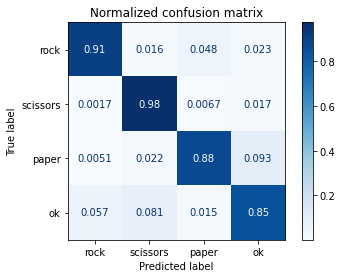

In [94]:
# Evaluate the Trained Model

# Predict the Trained Model on our Test data
y_pred_SVM = MODEL_SVM.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_SVM,y_pred_SVM)